In [58]:
# Import necessary libraries
import pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 
from sklearn.linear_model import LinearRegression

# pip install SQLAlchemy


In [59]:
# Connect to SQL server and connect to Books table. Assign the table data to a pandas DataFrame.
Server = 'DESKTOP-13K0I1P'
try:
    sqlServerConnection = pyodbc.connect('Driver={SQL Server};'
                      f'Server={Server};'
                      'Database=Books;'
                      'Trusted_Connection=yes;')
    SQL_read_query = pd.read_sql_query('SELECT * FROM Books', sqlServerConnection)

    # Create cursor connection to db
    df = pd.DataFrame(SQL_read_query, columns=['title', 'price', 'in_stock', 'rating', 'genre', 'upc', 'description'])
    print("The Books database from SqlServer is connected. Completing reading Books table.")
except pyodbc.Error as error:
    print("Error while connecting to SqlServer - ", error)
finally:
    if sqlServerConnection:
        sqlServerConnection.close()
        print("The SqlServer connection is closed")

The Books database from SqlServer is connected. Completing reading Books table.
The SqlServer connection is closed


In [60]:
df.head()

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...


In [61]:

# Summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN (Not a Number) values.
df.describe()

,price,in_stock
count,1000.000000,1000.000000
mean,35.070350,8.585000
std,14.446690,5.654622
min,10.000000,1.000000
25%,22.107501,3.000000
50%,35.980000,7.000000
75%,47.457499,14.000000
max,59.990002,22.000000


In [62]:
# Please note that the DATA have 1000 rows
df

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice&#39;s Adventures in...,55.529999,1,one,Classics,cd2a2a70dd5d176d,...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.060001,1,four,Sequential Art,bfd5e1701c862ac3,High school student Kei Nagai is struck dead i...
997,A Spy&#39;s Devotion (The Regency Spies of Lon...,16.969999,1,five,Historical Fiction,19fec36a1dfb4c16,"In Englandâ??s Regency era, manners and elegan..."
998,1st to Die (Women&#39;s Murder Club #1),53.980000,1,one,Mystery,f684a82adc49f011,"James Patterson, bestselling author of the Ale..."


<AxesSubplot:title={'center':'FREQUENCIES OF GENRES VARIBLE LEVELS'}, xlabel='genre'>

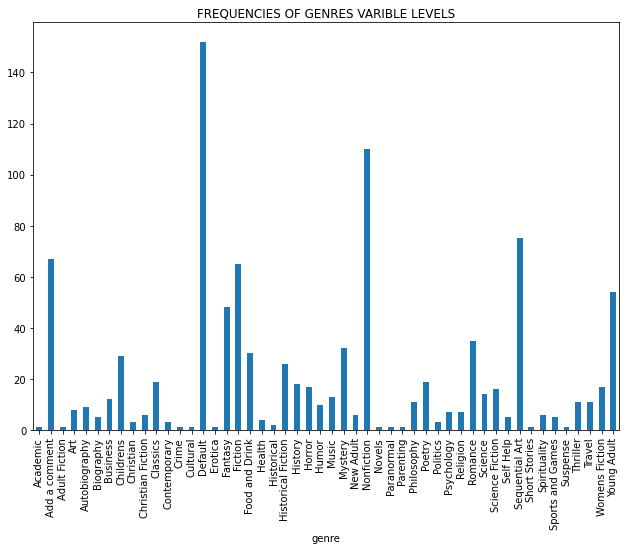

In [63]:
# What are the top GENRES?    
''' IMPORTANT: Please note that we need to CLEAN THE DATA (DROP Default and DROP Add a comment) '''

cut_freq_table = pd.crosstab(index=df['genre'], columns='freq')
cut_freq_table.plot(kind='bar', figsize=(10.5, 7.5), title = "FREQUENCIES OF GENRES VARIBLE LEVELS", legend= False )

In [64]:
'''
============================================== We need to clean this Data 67 rows ========================================================

'''
# We are going to delete the genre ===> "Add a comment"
df[df['genre']=='Add a comment']

,title,price,in_stock,rating,genre,upc,description
55,The Torch Is Passed: A Harding Family Story,19.090000,16,one,Add a comment,4eed62cf5f8d8edf,Andrea Harding is a recent college graduate lo...
63,The Mindfulness and Acceptance Workbook for An...,23.889999,16,four,Add a comment,31075275518532d7,Is anxiety and fear a problem for you? Have yo...
70,The Art Forger,40.759998,16,three,Add a comment,80cfab6bcff3a244,"On March 18, 1990, thirteen works of art today..."
88,On a Midnight Clear,14.070000,16,three,Add a comment,b757c0c361e689ce,It&#39;s Christmas Eve and private investigato...
97,Judo: Seven Steps to Black Belt (an Introducto...,53.900002,16,two,Add a comment,228f74b74f3a08ae,"Displaying the most impressive throws, compell..."
...,...,...,...,...,...,...,...
923,The Odyssey,29.639999,1,three,Add a comment,f0512adadffd2480,Literature&#39;s grandest evocation of life&#3...
929,The Light of the Fireflies,54.430000,1,one,Add a comment,04e43893e32f9d29,A haunting and hopeful tale of discovering lig...
931,The Iliad,16.160000,1,one,Add a comment,86d8bd7afa5b51b3,The Iliad is one of the two great epics of Hom...
939,The Communist Manifesto,14.760000,1,three,Add a comment,18b4545a5ed15581,A rousing call to arms whose influence is stil...


In [65]:
'''============================================== We need to clean this Data 152 ========================================================
'''
# We are going to delete the genre ===> "Default"
df[df['genre']=='Default']

,title,price,in_stock,rating,genre,upc,description
7,The Coming Woman: A Novel Based on the Life of...,17.930000,19,three,Default,e72a5dfc7e9267b2,"""If you have a heart, if you have a soul, Kare..."
8,The Boys in the Boat: Nine Americans and Their...,22.600000,19,four,Default,e10e1e165dc8be4a,For readers of Laura Hillenbrand&#39;s Seabisc...
10,"Starving Hearts (Triangular Trade Trilogy, #1)",13.990000,19,two,Default,0312262ecafa5a40,"Since her assault, Miss Annette Chetwynd has b..."
26,America&#39;s Cradle of Quarterbacks: Western ...,22.500000,19,three,Default,c7d160c2c0de586f,"Any fan of the Baltimore Colts of my era, any ..."
27,Aladdin and His Wonderful Lamp,53.130001,19,three,Default,904208d6aa64b655,Planning on seeing Aladdin the Disney musical?...
...,...,...,...,...,...,...,...
947,Shatter Me (Shatter Me #1),42.400002,1,one,Default,9ed7090d8fa690b0,I have a curseI have a giftI am a monsterI&#39...
955,Paradise Lost (Paradise #1),24.959999,1,one,Default,849db7ab7f4a640c,"â??Better to reign in Hell, than serve in Heav..."
960,On the Road (Duluoz Legend),32.360001,1,three,Default,9ff997ab15713e53,On the Road chronicles Jack Kerouac&#39;s year...
973,Jane Eyre,38.430000,1,five,Default,8d390a1fc3133d06,Orphaned into the household of her Aunt Reed a...


In [66]:
# Get the indices where genre is default and get indices where genre is Add a comment
'''
==============================================   Cleaning Data 152 rows + 67 = 219 rows  =====================================
'''
indices_genre_default=list(df.index[df['genre']=='Default'])
indices_genre_add_coment=list(df.index[df['genre']=='Add a comment'])
#indices_genre_default
#indices_genre_add_coment
clean_default=df.drop(indices_genre_default)
clean_data=clean_default.drop(indices_genre_add_coment)

''' THIS IS MY CLEAN DATA with 781 rows                       we no longer use df and now we are going to use only clean_data'''
clean_data

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice&#39;s Adventures in...,55.529999,1,one,Classics,cd2a2a70dd5d176d,...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.060001,1,four,Sequential Art,bfd5e1701c862ac3,High school student Kei Nagai is struck dead i...
997,A Spy&#39;s Devotion (The Regency Spies of Lon...,16.969999,1,five,Historical Fiction,19fec36a1dfb4c16,"In Englandâ??s Regency era, manners and elegan..."
998,1st to Die (Women&#39;s Murder Club #1),53.980000,1,one,Mystery,f684a82adc49f011,"James Patterson, bestselling author of the Ale..."


In [67]:
# I will change the 

clean_data

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice&#39;s Adventures in...,55.529999,1,one,Classics,cd2a2a70dd5d176d,...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.060001,1,four,Sequential Art,bfd5e1701c862ac3,High school student Kei Nagai is struck dead i...
997,A Spy&#39;s Devotion (The Regency Spies of Lon...,16.969999,1,five,Historical Fiction,19fec36a1dfb4c16,"In Englandâ??s Regency era, manners and elegan..."
998,1st to Die (Women&#39;s Murder Club #1),53.980000,1,one,Mystery,f684a82adc49f011,"James Patterson, bestselling author of the Ale..."


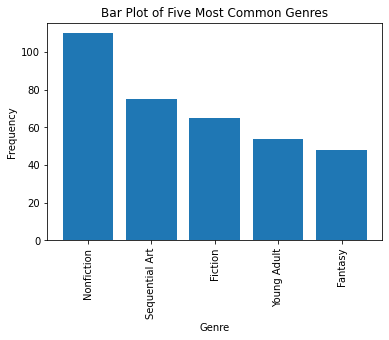

In [68]:


genre_dict = dict(Counter(clean_data['genre']).most_common(5))
genre_dict
plt.bar(genre_dict.keys(), genre_dict.values())

plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Bar Plot of Five Most Common Genres')
plt.xticks(rotation=90)
plt.show()

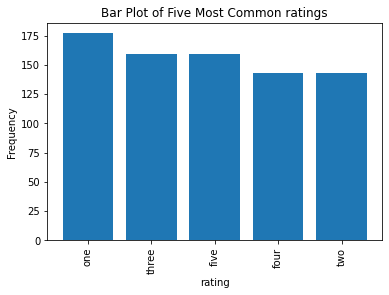

In [69]:
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt

genre_dict = dict(Counter(clean_data['rating']).most_common(5))
genre_dict
plt.bar(genre_dict.keys(), genre_dict.values())

plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Bar Plot of Five Most Common ratings')
plt.xticks(rotation=90)
plt.show()

In [70]:
clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description
28,Worlds Elsewhere: Journeys Around Shakespeareâ...,40.299999,18,five,Nonfiction,4c28def39d850cdf,"Anti-apartheid activist, Bollywood screenwrite..."
43,#HigherSelfie: Wake Up Your Life. Free Your So...,23.110001,17,five,Nonfiction,c27f6e1f185b0383,There is a cosmic alarm clock going off around...
115,Call the Nurse: True Stories of a Country Nurs...,29.139999,16,five,Nonfiction,bee3672891cca906,Tired of the pace and noise of life near Londo...
161,The Artist&#39;s Way: A Spiritual Path to High...,38.490002,15,five,Nonfiction,dd047728de72ad62,"""Without The Artist&#39;s Way, there would hav..."
214,Agnostic: A Spirited Manifesto,12.510000,15,five,Nonfiction,d195e7f4ed697350,A widely admired writer on religion celebrates...
290,Looking for Lovely: Collecting the Moments tha...,29.139999,14,five,Nonfiction,24af96df0bafb925,â??I want you to take every step of your life ...
292,Let It Out: A Journey Through Journaling,26.790001,14,five,Nonfiction,1174156c4a0eccaa,You want change. Maybe your career isnâ??t wha...
311,Eaternity: More than 150 Deliciously Easy Vega...,51.750000,14,five,Nonfiction,a01f6d368ef64dc5,Vegan chef and wellness expert Jason Wrobel of...
331,Brain on Fire: My Month of Madness,49.320000,14,five,Nonfiction,a80f66b254fe9eb3,An award-winning memoir and instant New York T...
342,Abstract City,56.369999,14,five,Nonfiction,cf1aa2fc02a7d1e0,"In July 2008, illustrator and designer Christo..."


In [71]:
clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description
457,Smarter Faster Better: The Secrets of Being Pr...,38.889999,8,five,Nonfiction,a2475a245c9907c4,A new book that explores the science of produc...
823,Into the Wild,56.700001,3,five,Nonfiction,a7c3f1010d64799a,In April 1992 a young man from a well-to-do fa...
837,Gratitude,26.660000,3,five,Nonfiction,c300cc9326592b65,A deeply moving testimony and celebration of h...
852,Disrupted: My Misadventure in the Start-Up Bubble,15.280000,3,five,Nonfiction,81372abc86f65c79,"INSTANT NEW YORK TIMES BESTSELLER ""Wildly ente..."
865,Brave Enough,51.320000,3,five,Nonfiction,fd2337c1b73b686e,"From the best-selling author of Wild, a collec..."
868,Blink: The Power of Thinking Without Thinking,21.740000,3,five,Nonfiction,0bbc48294707ba96,"In his landmark bestseller The Tipping Point, ..."
898,H is for Hawk,57.419998,2,five,Nonfiction,b6d3f4f4ee1f6069,When Helen Macdonald&#39;s father died suddenl...
910,Travels with Charley: In Search of America,57.820000,1,five,Nonfiction,0268f149d014b389,An intimate journey across and in search of Am...
915,The Tumor,41.560001,1,five,Nonfiction,6514add13c82b115,John Grisham says THE TUMOR is the most import...


In [72]:
# The assumption here is in order to determine the number of books that are more 
# sold based on their genre, rate, and the less number in the stock.
NonfictionTop5SoldBooks=[clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
NonfictionTop5SoldBooks

[                                                 title      price  in_stock  \
 823                                      Into the Wild  56.700001         3   
 837                                          Gratitude  26.660000         3   
 852  Disrupted: My Misadventure in the Start-Up Bubble  15.280000         3   
 865                                       Brave Enough  51.320000         3   
 868      Blink: The Power of Thinking Without Thinking  21.740000         3   
 898                                      H is for Hawk  57.419998         2   
 910         Travels with Charley: In Search of America  57.820000         1   
 915                                          The Tumor  41.560001         1   
 
     rating       genre               upc  \
 823   five  Nonfiction  a7c3f1010d64799a   
 837   five  Nonfiction  c300cc9326592b65   
 852   five  Nonfiction  81372abc86f65c79   
 865   five  Nonfiction  fd2337c1b73b686e   
 868   five  Nonfiction  0bbc48294707ba96   
 898   f

In [73]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description
13,Scott Pilgrim&#39;s Precious Little Life (Scot...,52.290001,19,five,Sequential Art,3b1c02bac2a429e6,Scott Pilgrim&#39;s life is totally sweet. He&...
80,"Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Pr...",13.610000,16,five,Sequential Art,0fa6dceead7ce47a,THE LONG-AWAITED STORY OF FANGIRLS TAKING ON T...
208,Batman: The Dark Knight Returns (Batman),15.380000,15,five,Sequential Art,47271d8e08b5d31c,This masterpiece of modern comics storytelling...
261,Superman Vol. 1: Before Truth (Superman by Gen...,11.890000,14,five,Sequential Art,ac8e3949d284e9a9,"Superman is going through some changes. First,..."
309,El Deafo,57.619999,14,five,Sequential Art,27c5968fe43cc06e,"Starting at a new school is scary, even more s..."
460,Roller Girl,14.100000,8,five,Sequential Art,aeb51dfbe8aeec59,"For fans of Raina Telgemeierâ??s Smile, a hear..."
721,"The Sandman, Vol. 3: Dream Country (The Sandma...",55.549999,3,five,Sequential Art,91eb9605998a7c03,The third volume of the Sandman collection is ...
784,"Saga, Volume 3 (Saga (Collected Editions) #3)",21.570000,3,five,Sequential Art,7b870bf85d01c2dc,From the Hugo Award-winning duo of Brian K. Va...
900,"Fruits Basket, Vol. 2 (Fruits Basket #2)",11.640000,2,five,Sequential Art,c0db71f6bb14db11,A family with an ancient curse...And the girl ...
954,"Rat Queens, Vol. 1: Sass & Sorcery (Rat Queens...",46.959999,1,five,Sequential Art,3cdca3b4a93980f5,Who are the Rat Queens? A pack of booze-guzzli...


In [74]:
clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description
460,Roller Girl,14.100000,8,five,Sequential Art,aeb51dfbe8aeec59,"For fans of Raina Telgemeierâ??s Smile, a hear..."
721,"The Sandman, Vol. 3: Dream Country (The Sandma...",55.549999,3,five,Sequential Art,91eb9605998a7c03,The third volume of the Sandman collection is ...
784,"Saga, Volume 3 (Saga (Collected Editions) #3)",21.570000,3,five,Sequential Art,7b870bf85d01c2dc,From the Hugo Award-winning duo of Brian K. Va...
900,"Fruits Basket, Vol. 2 (Fruits Basket #2)",11.640000,2,five,Sequential Art,c0db71f6bb14db11,A family with an ancient curse...And the girl ...
954,"Rat Queens, Vol. 1: Sass & Sorcery (Rat Queens...",46.959999,1,five,Sequential Art,3cdca3b4a93980f5,Who are the Rat Queens? A pack of booze-guzzli...
979,"Fruits Basket, Vol. 1 (Fruits Basket #1)",40.279999,1,five,Sequential Art,72e6fbf4f6382557,A family with an ancient curse...And the girl ...
993,"Bleach, Vol. 1: Strawberry and the Soul Reaper...",34.650002,1,five,Sequential Art,099fae4a0705d63b,"Hot-tempered 15-year-old Ichigo Kurosaki, the ..."


In [75]:
# The assumption here is in order to determine the number of books that are more 
# sold based on their genre, rate, and the less number in the stock.
SequentialArtTop5SoldBooks=[clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
SequentialArtTop5SoldBooks

[                                                 title      price  in_stock  \
 721  The Sandman, Vol. 3: Dream Country (The Sandma...  55.549999         3   
 784      Saga, Volume 3 (Saga (Collected Editions) #3)  21.570000         3   
 900           Fruits Basket, Vol. 2 (Fruits Basket #2)  11.640000         2   
 954  Rat Queens, Vol. 1: Sass & Sorcery (Rat Queens...  46.959999         1   
 979           Fruits Basket, Vol. 1 (Fruits Basket #1)  40.279999         1   
 993  Bleach, Vol. 1: Strawberry and the Soul Reaper...  34.650002         1   
 
     rating           genre               upc  \
 721   five  Sequential Art  91eb9605998a7c03   
 784   five  Sequential Art  7b870bf85d01c2dc   
 900   five  Sequential Art  c0db71f6bb14db11   
 954   five  Sequential Art  3cdca3b4a93980f5   
 979   five  Sequential Art  72e6fbf4f6382557   
 993   five  Sequential Art  099fae4a0705d63b   
 
                                            description  
 721  The third volume of the Sandm

In [76]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description
42,Private Paris (Private #10),47.610001,17,five,Fiction,b12b89017878a60d,Paris is burning--and only Private&#39;s Jack ...
46,"We Love You, Charlie Freeman",50.270000,16,five,Fiction,8d455c7539795d2a,"The Freeman family--Charles, Laurel, and their..."
54,Thirst,17.270000,16,five,Fiction,709822d0b5bcb7f4,"On a searing summer Friday, Eddie Chapman has ..."
142,The Regional Office Is Under Attack!,51.360001,15,five,Fiction,0651062381f0636a,In a world beset by amassing forces of darknes...
193,Finders Keepers (Bill Hodges Trilogy #2),53.529999,15,five,Fiction,edb3097e71330040,"A masterful, intensely suspenseful novel about..."
234,The Time Keeper,27.879999,14,five,Fiction,e9906e2f0d189745,"In this fable, the first man on earth to count..."
316,Dear Mr. Knightley,11.210000,14,five,Fiction,94a958ea126cdcd5,Dear Mr. Knightley is a contemporary epistolar...
359,The Silent Sister (Riley MacPherson #1),46.290001,12,five,Fiction,ce1ae197ada2aec4,"In The Silent Sister, Riley MacPherson has spe..."
607,Siddhartha,34.220001,5,five,Fiction,84bb29c53592ac40,"In the novel, Siddhartha, a young man, leaves ..."
631,Digital Fortress,58.000000,5,five,Fiction,94bb629a3f6dd00b,"Before the multi-million, runaway bestseller T..."


In [77]:
clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description
607,Siddhartha,34.220001,5,five,Fiction,84bb29c53592ac40,"In the novel, Siddhartha, a young man, leaves ..."
631,Digital Fortress,58.000000,5,five,Fiction,94bb629a3f6dd00b,"Before the multi-million, runaway bestseller T..."
686,Atlas Shrugged,26.580000,4,five,Fiction,78a4ac98191ac675,This is the story of a man who said that he wo...
744,The Husband&#39;s Secret,52.509998,3,five,Fiction,ff6bb30dd0c482a6,At the heart of The Husbandâ??s Secret is a le...
824,Inferno (Robert Langdon #4),41.000000,3,five,Fiction,6c4646d90b60a56c,In his international blockbusters The Da Vinci...
857,Crazy Rich Asians (Crazy Rich Asians #1),49.130001,3,five,Fiction,c9782ad2a0ed9331,Crazy Rich Asians is the outrageously funny de...
917,The Silent Wife,12.340000,1,five,Fiction,b78deb463531d078,A chilling psychological thriller about a marr...
972,Kitchens of the Great Midwest,57.200001,1,five,Fiction,06f6a57a6d532844,â??A sweet and savory treat.â? â??Peopleâ??An...
989,Bright Lines,39.070000,1,five,Fiction,230ac636ea0ea415,"A vibrant debut novel, set in Brooklyn and Ban..."


In [78]:
fictionTop5SoldBooks=[clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
fictionTop5SoldBooks

[                                        title      price  in_stock rating  \
 686                            Atlas Shrugged  26.580000         4   five   
 744                  The Husband&#39;s Secret  52.509998         3   five   
 824               Inferno (Robert Langdon #4)  41.000000         3   five   
 857  Crazy Rich Asians (Crazy Rich Asians #1)  49.130001         3   five   
 917                           The Silent Wife  12.340000         1   five   
 972             Kitchens of the Great Midwest  57.200001         1   five   
 989                              Bright Lines  39.070000         1   five   
 
        genre               upc  \
 686  Fiction  78a4ac98191ac675   
 744  Fiction  ff6bb30dd0c482a6   
 824  Fiction  6c4646d90b60a56c   
 857  Fiction  c9782ad2a0ed9331   
 917  Fiction  b78deb463531d078   
 972  Fiction  06f6a57a6d532844   
 989  Fiction  230ac636ea0ea415   
 
                                            description  
 686  This is the story of a man w

In [79]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description
12,Set Me Free,17.459999,19,five,Young Adult,ce6396b0f23f6ecc,Aaron Ledbetterâ??s future had been planned ou...
172,Scarlett Epstein Hates It Here,43.549999,15,five,Young Adult,1c929cfd16b71907,"Meet Scarlett Epstein, BNF (Big Name Fan) in h..."
184,Library of Souls (Miss Peregrineâ\x80\x99s Pec...,48.560001,15,five,Young Adult,ba54932df84e8cea,A boy with extraordinary powers. An army of de...
190,Frostbite (Vampire Academy #2),29.990000,15,five,Young Adult,116a2fdc9a45bab0,"WHEN LOVE AND JEALOUSY COLLIDE ON THE SLOPES, ..."
253,The Darkest Lie,35.349998,14,five,Young Adult,6edacfd1f8ebb9eb,â??The mother I knew would never do those thin...
364,The Epidemic (The Program 0.6),14.440000,12,five,Young Adult,f732d7d18a91d2ba,Can one girl help others find closure by slipp...
465,My Life Next Door (My Life Next Door ),36.389999,8,five,Young Adult,9a7291b89bd5445c,"""One thing my mother never knew, and would dis..."
481,Future Shock (Future Shock #1),55.650002,8,five,Young Adult,df6a7c43faa6732b,"What do you do when the future is too late, an..."
601,The Darkest Corners,11.330000,5,five,Young Adult,c4182bdb53e2459a,The Darkest Corners is a psychological thrille...
619,Kill the Boy Band,15.520000,5,five,Young Adult,44f545727e704187,Just know from the start that it wasnâ??t supp...


In [80]:
clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description
465,My Life Next Door (My Life Next Door ),36.389999,8,five,Young Adult,9a7291b89bd5445c,"""One thing my mother never knew, and would dis..."
481,Future Shock (Future Shock #1),55.650002,8,five,Young Adult,df6a7c43faa6732b,"What do you do when the future is too late, an..."
601,The Darkest Corners,11.330000,5,five,Young Adult,c4182bdb53e2459a,The Darkest Corners is a psychological thrille...
619,Kill the Boy Band,15.520000,5,five,Young Adult,44f545727e704187,Just know from the start that it wasnâ??t supp...
620,Isla and the Happily Ever After (Anna and the ...,48.130001,5,five,Young Adult,45045146dbf7b009,"Love ignites in the City That Never Sleeps, bu..."
638,An Abundance of Katherines,10.000000,5,five,Young Adult,f36d24c309e87e5b,Katherine V thought boys were gross Katherine ...
819,Lady Renegades (Rebel Belle #3),53.040001,3,five,Young Adult,16e843e6b853cc2f,Just as Harper Price starts coming to terms wi...
880,Annie on My Mind,36.830002,3,five,Young Adult,7bf87402413c27ff,This groundbreaking book is the story of two t...
933,The Haters,27.889999,1,five,Young Adult,fff8a057a40c4a60,"From Jesse Andrews, author of the New York Tim..."


In [81]:
youngAdultTop5SoldBooks=[clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
youngAdultTop5SoldBooks

[                               title      price  in_stock rating        genre  \
 819  Lady Renegades (Rebel Belle #3)  53.040001         3   five  Young Adult   
 880                 Annie on My Mind  36.830002         3   five  Young Adult   
 933                       The Haters  27.889999         1   five  Young Adult   
 
                   upc                                        description  
 819  16e843e6b853cc2f  Just as Harper Price starts coming to terms wi...  
 880  7bf87402413c27ff  This groundbreaking book is the story of two t...  
 933  fff8a057a40c4a60  From Jesse Andrews, author of the New York Tim...  ]

In [82]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description
81,Princess Between Worlds (Wide-Awake Princess #5),13.340000,16,five,Fantasy,0e691eda369f4e09,Just as Annie and Liam are busy making plans t...
236,The Star-Touched Queen,46.020000,14,five,Fantasy,1528279aec1f3dce,Fate and fortune. Power and passion. What does...
315,Demigods & Magicians: Percy and Annabeth Meet ...,37.509998,14,five,Fantasy,3c6fe637a0180b01,"Magic, monsters, and mayhem abound when Percy ..."
358,The Star-Touched Queen,32.299999,12,five,Fantasy,4a7a25be293ad678,Fate and fortune. Power and passion. What does...
527,King&#39;s Folly (The Kinsman Chronicles #1),39.610001,7,five,Fantasy,4c82371b8cd02d4d,"The gods are angry.Volcanic eruptions, sinkhol..."
535,Every Heart a Doorway (Every Heart A Doorway #1),12.160000,7,five,Fantasy,4fa75fc6829431ca,Eleanor Westâ??s Home for Wayward ChildrenNo S...
598,The False Prince (The Ascendance Trilogy #1),56.000000,5,five,Fantasy,a2a9f76339d21ab1,The False Prince is the thrilling first book i...
658,The Beast (Black Dagger Brotherhood #14),46.080002,4,five,Fantasy,8930013d06942df1,Rhage and Mary return in a new novel of the Bl...
661,Paper and Fire (The Great Library #2),49.450001,4,five,Fantasy,ae884ac655d6ee3e,"In Ink and Bone, New York Times bestselling au..."
674,Harry Potter and the Half-Blood Prince (Harry ...,48.750000,4,five,Fantasy,73f4f87dd936ee5c,"It is the middle of the summer, but there is a..."


In [83]:
clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description
527,King&#39;s Folly (The Kinsman Chronicles #1),39.610001,7,five,Fantasy,4c82371b8cd02d4d,"The gods are angry.Volcanic eruptions, sinkhol..."
535,Every Heart a Doorway (Every Heart A Doorway #1),12.160000,7,five,Fantasy,4fa75fc6829431ca,Eleanor Westâ??s Home for Wayward ChildrenNo S...
598,The False Prince (The Ascendance Trilogy #1),56.000000,5,five,Fantasy,a2a9f76339d21ab1,The False Prince is the thrilling first book i...
658,The Beast (Black Dagger Brotherhood #14),46.080002,4,five,Fantasy,8930013d06942df1,Rhage and Mary return in a new novel of the Bl...
661,Paper and Fire (The Great Library #2),49.450001,4,five,Fantasy,ae884ac655d6ee3e,"In Ink and Bone, New York Times bestselling au..."
674,Harry Potter and the Half-Blood Prince (Harry ...,48.750000,4,five,Fantasy,73f4f87dd936ee5c,"It is the middle of the summer, but there is a..."


In [84]:
fantasyTop5SoldBooks=[clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
fantasyTop5SoldBooks

[                                                 title      price  in_stock  \
 658           The Beast (Black Dagger Brotherhood #14)  46.080002         4   
 661              Paper and Fire (The Great Library #2)  49.450001         4   
 674  Harry Potter and the Half-Blood Prince (Harry ...  48.750000         4   
 
     rating    genre               upc  \
 658   five  Fantasy  8930013d06942df1   
 661   five  Fantasy  ae884ac655d6ee3e   
 674   five  Fantasy  73f4f87dd936ee5c   
 
                                            description  
 658  Rhage and Mary return in a new novel of the Bl...  
 661  In Ink and Bone, New York Times bestselling au...  
 674  It is the middle of the summer, but there is a...  ]

In [85]:
# I want a list of the top sold books based on their top 5 genres AND rating= five AND in-stock < 5 
Top5Soldbooksbytop5genres=NonfictionTop5SoldBooks + SequentialArtTop5SoldBooks + fictionTop5SoldBooks + youngAdultTop5SoldBooks + fantasyTop5SoldBooks
Top5Soldbooksbytop5genres

[                                                 title      price  in_stock  \
 823                                      Into the Wild  56.700001         3   
 837                                          Gratitude  26.660000         3   
 852  Disrupted: My Misadventure in the Start-Up Bubble  15.280000         3   
 865                                       Brave Enough  51.320000         3   
 868      Blink: The Power of Thinking Without Thinking  21.740000         3   
 898                                      H is for Hawk  57.419998         2   
 910         Travels with Charley: In Search of America  57.820000         1   
 915                                          The Tumor  41.560001         1   
 
     rating       genre               upc  \
 823   five  Nonfiction  a7c3f1010d64799a   
 837   five  Nonfiction  c300cc9326592b65   
 852   five  Nonfiction  81372abc86f65c79   
 865   five  Nonfiction  fd2337c1b73b686e   
 868   five  Nonfiction  0bbc48294707ba96   
 898   f

In [86]:
# ratingFiveNonfiction    - This variable carries all books that are Nonfiction that have a rate     = five
# ratingFiveSequentialArt - This variable carries all books that are Sequential Art that have a rate = five
# ratingFiveFiction       - This variable carries all books that are Fiction and have a rate         = five
# ratingFiveYoungAdult    - This variable carries all books that are Young Adult and have a rate     = five
# ratingFiveYoungFantasy  - This variable carries all books that are Fantasy and have a rate         = five

ratingFiveNonfiction=[clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five')]]
ratingFiveSequentialArt=[clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five')]]
ratingFiveFiction=[clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five')]]
ratingFiveYoungAdult=[clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five')]]
ratingFiveYoungFantasy=[clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five')]]


C:\Users\baoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


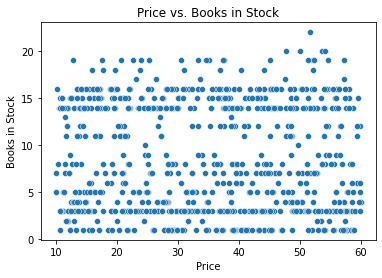

In [87]:
# This grath PRICE VS Books in Stock informs us about: SCATTERPLOAT
#          3)We need to check the Highest number of books in stock (22 Books)                  df[df['in_stock']>20]
#          4)We need to check the Highest price  of the books in this dataset($60.00)          df[df['price']>=59.99]
#          5)We need to check the cheapest book in the dataset                                 df[df['price']<=10]      
'''
The outlayers in the graph we can see in the y-axis(Books in-stock): 22 Books in stock, which title is: A Light in the Attic
We can check the highest number of books in the stock:  df[df['in_stock']>20] --- check line 16 of this jupyter notebook.
'''

sns.scatterplot(clean_data['price'], clean_data['in_stock'])

plt.title('Price vs. Books in Stock')

plt.ylabel('Books in Stock')

plt.xlabel('Price')

plt.show()

In [88]:
# This is the Book the have more in stock.
clean_data[clean_data['in_stock']>20]

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.77,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...


In [89]:
 # This is the most expensive Book
clean_data[clean_data['price']>59.99]

,title,price,in_stock,rating,genre,upc,description
648,The Perfect Play (Play by Play #1),59.990002,4,three,Romance,9cc207168a03470d,"Football pro Mick Riley is an all-star, both o..."


In [90]:
 # This is the cheapest Book
clean_data[clean_data['price']<=10]

,title,price,in_stock,rating,genre,upc,description
638,An Abundance of Katherines,10.0,5,five,Young Adult,f36d24c309e87e5b,Katherine V thought boys were gross Katherine ...


Printing the dict:  {'five': 159, 'four': 143, 'one': 177, 'three': 159, 'two': 143}


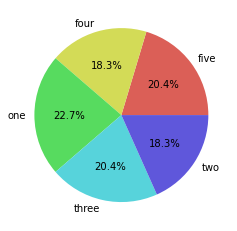

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cut_Series = clean_data['rating']
    
rating_frequency_dictionary={}
for word in sorted(cut_Series):
    if word in rating_frequency_dictionary:
        rating_frequency_dictionary[word]+=1
    else:
        rating_frequency_dictionary[word]=1
print("Printing the dict: ",rating_frequency_dictionary)
        
# Data to plot
labels = []
data = []

for key, value in (rating_frequency_dictionary.items()):
    labels.append(key)
    data.append(value)
    
# Plot
colors = sns.color_palette('hls')
plt.pie(data, labels=labels, colors=colors, autopct = '%1.1f%%')

#plt.legend()
plt.show()    


---- 5 unique values in rating
['three' 'one' 'four' 'five' 'two']
---- 50 unique values in genre
['Poetry' 'Historical Fiction' 'Fiction' 'Mystery' 'History' 'Young Adult'
 'Business' 'Default' 'Sequential Art' 'Music' 'Science Fiction'
 'Politics' 'Travel' 'Thriller' 'Food and Drink' 'Romance' 'Childrens'
 'Nonfiction' 'Art' 'Spirituality' 'Philosophy' 'New Adult' 'Contemporary'
 'Fantasy' 'Add a comment' 'Science' 'Health' 'Horror' 'Self Help'
 'Religion' 'Christian' 'Crime' 'Autobiography' 'Christian Fiction'
 'Biography' 'Womens Fiction' 'Erotica' 'Cultural' 'Psychology' 'Humor'
 'Historical' 'Novels' 'Short Stories' 'Suspense' 'Classics' 'Academic'
 'Sports and Games' 'Adult Fiction' 'Parenting' 'Paranormal']


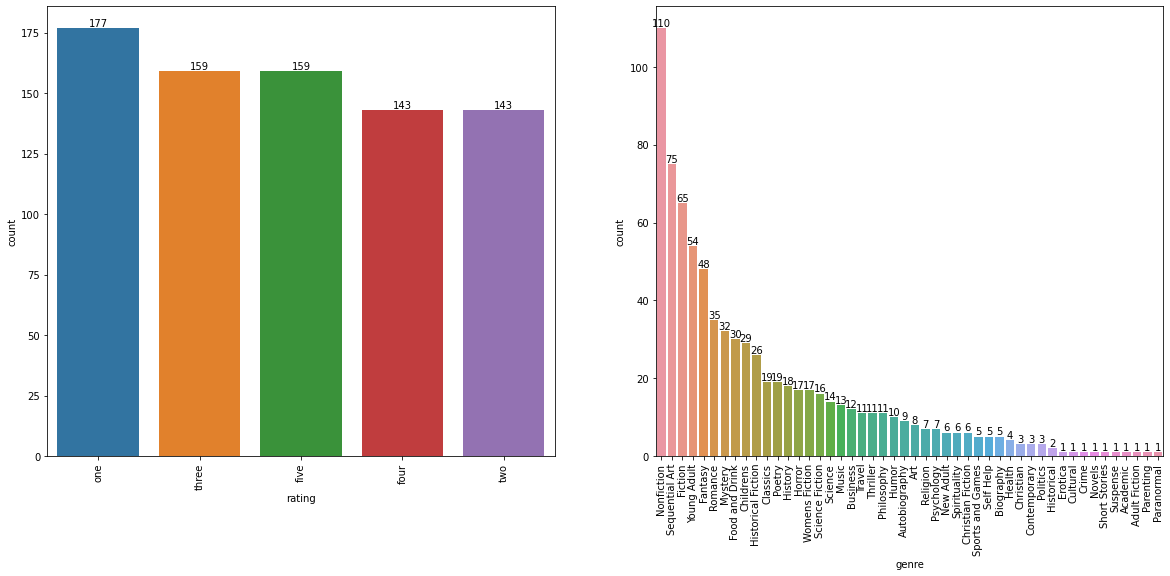

In [92]:
'''
===========================================  VAN I AM USING YOUR CODE WITH THE CLEAN DATA ================================================================================

'''

# Relevant numerical column
numerical_columns = ['price','in_stock']
categorical_columns = ['rating','genre']

# Unique values in categorical columns
fig, axs = plt.subplots(ncols=2,figsize=(20, 8.27))
for index,column in enumerate(categorical_columns):
    print('---- ' + str(len(df[column].unique())) + ' unique values in ' + column  )
    
    print(df[column].unique())
    
    chart = sns.countplot(x=clean_data[column],ax=axs[index],order=clean_data[column].value_counts().index)
    chart.bar_label(chart.containers[0])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [93]:
clean_data.head()

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...


In [94]:
clean_data['rating'] = clean_data['rating'].replace(['one','two','three','four','five'],[1,2,3,4,5])

In [100]:
clean_data

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,3,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,1,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,1,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,4,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,5,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice&#39;s Adventures in...,55.529999,1,1,Classics,cd2a2a70dd5d176d,...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.060001,1,4,Sequential Art,bfd5e1701c862ac3,High school student Kei Nagai is struck dead i...
997,A Spy&#39;s Devotion (The Regency Spies of Lon...,16.969999,1,5,Historical Fiction,19fec36a1dfb4c16,"In Englandâ??s Regency era, manners and elegan..."
998,1st to Die (Women&#39;s Murder Club #1),53.980000,1,1,Mystery,f684a82adc49f011,"James Patterson, bestselling author of the Ale..."


In [104]:
x=clean_data[['price']].to_numpy()
y=clean_data[['rating']].to_numpy()

'''Create and fit a linear regression model'''
model = LinearRegression()
model.fit(x, y)

'''check results and R-squared'''
print("\nCoefficients:\n")
print(model.coef_)
print("\nR2:\n")
print(model.score(x, y))



Coefficients:

[[0.00299064]]

R2:

0.0009017588944418842


In [113]:
x=clean_data[['in_stock']].to_numpy()

y=clean_data[['rating']].to_numpy()

'''Create and fit a linear regression model'''
model = LinearRegression()
model.fit(x, y)

'''check results and R-squared'''
print("\nCoefficients:\n")
print(model.coef_)
print("\nR2:\n")
print(model.score(x, y))


Coefficients:

[[-0.001056]]

R2:

1.7548093125596687e-05


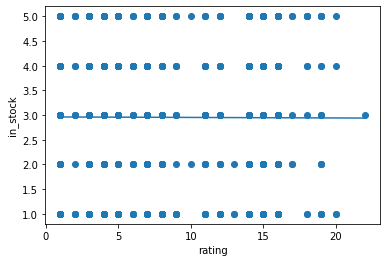

In [114]:
'''Use the fitted model to predict estimated rating (y_est) on original in_stock (x)'''
y_est = model.predict(x)

'''Plot the estimated line along with scattered raw data on figure'''
ax=plt.axes()
ax.set_xlabel('rating')
ax.set_ylabel('in_stock')
ax.scatter(x, y)
ax.plot(x,y_est)


In [109]:
x=clean_data[['in_stock','rating']].to_numpy()

y=clean_data[['rating']].to_numpy()

'''Create and fit a linear regression model'''
model = LinearRegression()
model.fit(x, y)

'''check results and R-squared'''
print("\nCoefficients:\n")
print(model.coef_)
print("\nR2:\n")
print(model.score(x, y))


Coefficients:

[[-5.72191825e-18  1.00000000e+00]]

R2:

1.0


In [102]:
clean_data[['genre']].to_numpy()

array([['Poetry'],
       ['Historical Fiction'],
       ['Fiction'],
       ['Mystery'],
       ['History'],
       ['Young Adult'],
       ['Business'],
       ['Poetry'],
       ['Poetry'],
       ['Young Adult'],
       ['Sequential Art'],
       ['Music'],
       ['Music'],
       ['Poetry'],
       ['Science Fiction'],
       ['Politics'],
       ['Travel'],
       ['Thriller'],
       ['Music'],
       ['Food and Drink'],
       ['Romance'],
       ['Romance'],
       ['Childrens'],
       ['Nonfiction'],
       ['Art'],
       ['Spirituality'],
       ['Nonfiction'],
       ['Thriller'],
       ['Childrens'],
       ['Philosophy'],
       ['Mystery'],
       ['Thriller'],
       ['Poetry'],
       ['Poetry'],
       ['Nonfiction'],
       ['Fiction'],
       ['Nonfiction'],
       ['New Adult'],
       ['Contemporary'],
       ['Fiction'],
       ['Poetry'],
       ['Nonfiction'],
       ['Fantasy'],
       ['History'],
       ['Sequential Art'],
       ['Nonfiction'],
       [

In [103]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        781 non-null    object 
 1   price        781 non-null    float64
 2   in_stock     781 non-null    int64  
 3   rating       781 non-null    int64  
 4   genre        781 non-null    object 
 5   upc          781 non-null    object 
 6   description  781 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 65.0+ KB


In [99]:
clean_data

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,3,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,1,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,1,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,4,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,5,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice&#39;s Adventures in...,55.529999,1,1,Classics,cd2a2a70dd5d176d,...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.060001,1,4,Sequential Art,bfd5e1701c862ac3,High school student Kei Nagai is struck dead i...
997,A Spy&#39;s Devotion (The Regency Spies of Lon...,16.969999,1,5,Historical Fiction,19fec36a1dfb4c16,"In Englandâ??s Regency era, manners and elegan..."
998,1st to Die (Women&#39;s Murder Club #1),53.980000,1,1,Mystery,f684a82adc49f011,"James Patterson, bestselling author of the Ale..."


In [106]:
df_dc = pd.get_dummies(clean_data, columns=['genre'])

In [107]:
df_dc

,title,price,in_stock,rating,upc,description,genre_Academic,genre_Adult Fiction,genre_Art,genre_Autobiography,...,genre_Self Help,genre_Sequential Art,genre_Short Stories,genre_Spirituality,genre_Sports and Games,genre_Suspense,genre_Thriller,genre_Travel,genre_Womens Fiction,genre_Young Adult
0,A Light in the Attic,51.770000,22,3,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tipping the Velvet,53.740002,20,1,90fa61229261140a,"""Erotic and absorbing...Written with starling ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Soumission,50.099998,20,1,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sharp Objects,47.820000,20,4,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sapiens: A Brief History of Humankind,54.230000,20,5,4165285e1663650f,From a renowned historian comes a groundbreaki...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice&#39;s Adventures in...,55.529999,1,1,cd2a2a70dd5d176d,...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.060001,1,4,bfd5e1701c862ac3,High school student Kei Nagai is struck dead i...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
997,A Spy&#39;s Devotion (The Regency Spies of Lon...,16.969999,1,5,19fec36a1dfb4c16,"In Englandâ??s Regency era, manners and elegan...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,1st to Die (Women&#39;s Murder Club #1),53.980000,1,1,f684a82adc49f011,"James Patterson, bestselling author of the Ale...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
